In [1]:
from utils.data_handling import *
from utils.sensor_optimisation import *
from parameters import *
import GPy

import matplotlib.pyplot as plt
GPy.plotting.change_plotting_library('matplotlib')

In [2]:
parameters['i_end'] = 100
parameters

{'i_start': 0,
 'i_end': 100,
 'crop': None,
 'field_name': 'TracerBackground',
 'cov_method': 'sample'}

In [3]:
loaded = initial_load_data(parameters, recompute=False)
ref_vtu, data_df, loc_df, time_df = loaded

100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

### Loading files from original VTU
==> Import vtu files from 0 to 0


Number of Locations after cropping :  100040
==> Loading from : ../data/temp_data/cache_0_100_None/loc_TracerBackground.pkl
==> Loading from : ../data/temp_data/cache_0_100_None/time_TracerBackground.pkl
==> Loading from : ../data/temp_data/cache_0_100_None/data_TracerBackground.pkl


In [4]:
# Select slice of Data for 2D GP : 
I = idx_slice(loc_df, direction='Z', s_min=0.0, s_max=1.0)


In [5]:
# Data for the regression
dim = 3
t = 100
X = loc_df.values[I]
Y = data_df.values[I,t].reshape(-1,1)
X.shape

(9561, 3)

In [11]:
kernel = GPy.kern.Matern52(dim,ARD=True) + GPy.kern.White(dim)
m = GPy.models.SparseGPRegression(X,Y,kernel,num_inducing = 100)
m.likelihood.variance = 0.01


In [12]:
m

sparse_gp.,value,constraints,priors
inducing inputs,"(100, 3)",,
sum.Mat52.variance,1.0,+ve,
sum.Mat52.lengthscale,"(3,)",+ve,
sum.white.variance,1.0,+ve,
Gaussian_noise.variance,0.01,+ve,


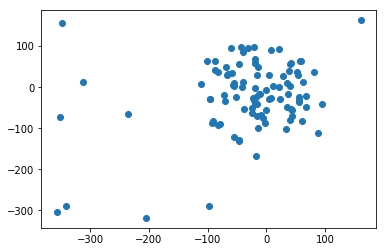

In [13]:
plt.scatter(m.inducing_inputs.values[:,0],m.inducing_inputs.values[:,1])

In [14]:
m.optimize(messages=True,max_f_eval = 1000000)


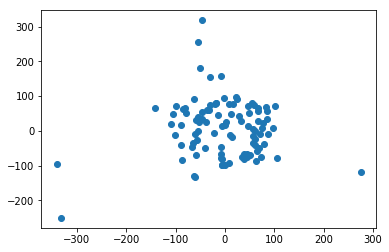

In [10]:
plt.scatter(m.inducing_inputs.values[:,0],m.inducing_inputs.values[:,1])

In [50]:
m.optimize(messages=True,max_f_eval = 1000000)


In [52]:
m.sum.Mat52.lengthscale

index,GP_regression.sum.Mat52.lengthscale,constraints,priors
[0],28.73632811,+ve,
[1],54.36099699,+ve,
[2],1602.96477922,+ve,
